In [43]:
import MulensModel as mm
import matplotlib.pyplot as plt

In [44]:
my_pspl_model = mm.Model({'t_0': 2452848.06, 'u_0': 0.133, 't_E': 61.5})
my_1S2L_model = mm.Model({'t_0': 2452848.06, 'u_0': 0.133,
     't_E': 61.5, 'rho': 0.0008, 'q': 0.009, 's': 1.120,
     'alpha': 223.8})
my_1S2L_model.set_magnification_methods([2452833., 'VBBL', 2452845.])

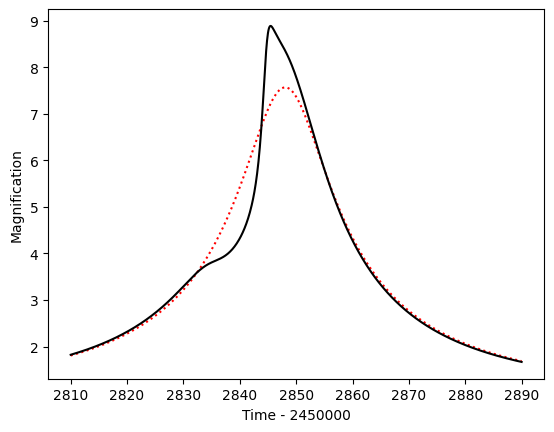

In [45]:
my_pspl_model.plot_magnification(t_range=[2452810, 2452890],
    subtract_2450000=True, color='red', linestyle=':')
my_1S2L_model.plot_magnification(t_range=[2452810, 2452890],
    subtract_2450000=True, color='black')
plt.show()

In [46]:
from astropy.io import ascii

metadata = ascii.read('microlensing_events.ipac', format='ipac') 


In [49]:
from astropy.io import ascii
import os
from tqdm import tqdm

# Read the IPAC file
fdir = "data/lightcurves/"
directory = os.fsencode(fdir)

curves = []

i = 0
for file in tqdm(os.listdir(directory)):
    filename = os.fsdecode(file)
    curve = ascii.read(fdir + filename, format='ipac') 
    curves.append(curve)
    i+=1
    if i == 100:
        break

  2%|▏         | 99/6113 [00:18<18:39,  5.37it/s]


In [50]:
sample = curves

[-- -- -- ... False -- --] 8724
3360
3360


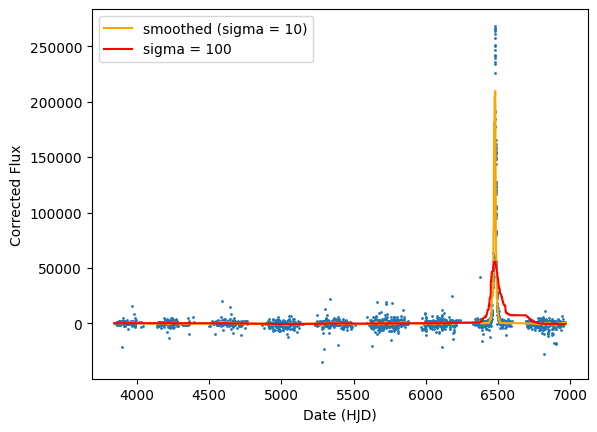

In [72]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np

curve = sample[0]
plt.scatter(curve['HJD'], curve["cor_flux"], s=1)

mask = np.isnan(curve["cor_flux"]) | (curve["cor_flux"] == 0)
print(mask, len(mask))
masked_array = np.ma.array(curve["cor_flux"], mask=mask).compressed()
masked_HJD = np.ma.masked_where(mask, curve["HJD"]).compressed()
print(len(masked_array))
print(len(masked_HJD))

smoothed = gaussian_filter(masked_array, sigma=10)
plt.plot(masked_HJD, smoothed, color="orange", label="smoothed (sigma = 10)")
supa_smooth = gaussian_filter(masked_array, sigma=100)
plt.plot(masked_HJD, supa_smooth, color="red", label="sigma = 100")
plt.ylabel("Corrected Flux")
plt.xlabel("Date (HJD)")

plt.legend()
#plt.yscale('log')

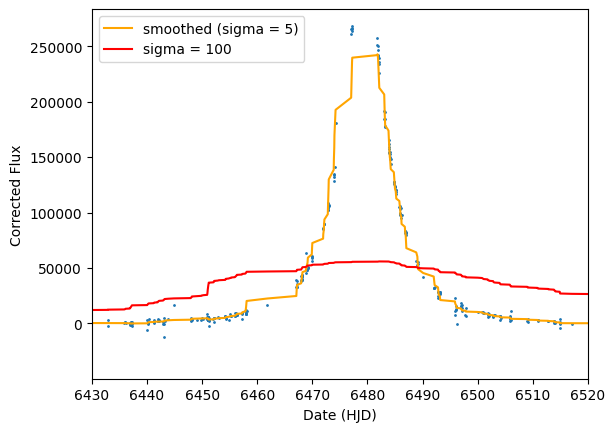

In [75]:
plt.scatter(masked_HJD, masked_array, s=1)
smooth = gaussian_filter(masked_array, sigma=5)
plt.plot(masked_HJD, smooth, color="orange", label="smoothed (sigma = 5)")
plt.plot(masked_HJD, supa_smooth, color="red", label="sigma = 100")
plt.xlim(6430, 6520)
plt.ylabel("Corrected Flux")
plt.xlabel("Date (HJD)")
plt.legend()
#plt.yscale('log')

18768 --


/tmp/ipykernel_128769/2122488150.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


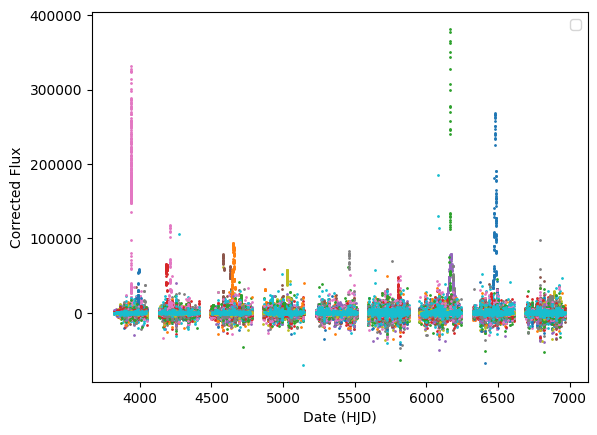

In [62]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np

for curve in sample:
    plt.scatter(curve['HJD'], curve["cor_flux"], s=1)

mask = np.isnan(curve["cor_flux"]) | (curve["cor_flux"] == 0)

print(len(mask), sum(mask))
masked_array = np.ma.array(curve["cor_flux"], mask=mask)
masked_HJD = np.ma.array(curve["HJD"], mask=mask)

#smoothed = gaussian_filter(masked_array, sigma=10)
#plt.plot(curve['HJD'], smoothed, color="orange", label="smoothed (sigma = 10)")
#supa_smooth = gaussian_filter(masked_array, sigma=100)
#plt.plot(curve['HJD'], supa_smooth, color="red", label="sigma = 100")
plt.ylabel("Corrected Flux")
plt.xlabel("Date (HJD)")

#plt.legend()
#plt.yscale('log')